In [49]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt


In [50]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train_binary= x_train[(y_train==0) | (y_train==1)]
y_train_binary= y_train[(y_train==0) | (y_train==1)]

x_train_binary.shape

(12665, 28, 28)

In [51]:
x_test_binary= x_test[(y_test==0) | (y_test==1)]
y_test_binary= y_test[(y_test==0) | (y_test==1)]

In [52]:
#Normalize image pixel values.
x_train_binary = x_train_binary/255
x_test_binary = x_test_binary/255

In [53]:
model=keras.Sequential() #Create a network sequence.

model.add(Input(shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(120,activation = 'tanh'))
model.add(Dense(84,activation = 'tanh'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 120)               94200     
                                                                 
 dense_10 (Dense)            (None, 84)                10164     
                                                                 
 dense_11 (Dense)            (None, 1)                 85        
                                                                 
Total params: 104,449
Trainable params: 104,449
Non-trainable params: 0
_________________________________________________________________


In [54]:
x_train_binary.shape

(12665, 28, 28)

In [55]:

model.compile(optimizer='Adam',loss="binary_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train_binary,y_train_binary,epochs=10,batch_size=128,validation_data=(x_test_binary, y_test_binary))



Epoch 1/10
99/99 [==============================] - 1s 4ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0016 - val_accuracy: 0.9995
Epoch 2/10
99/99 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 3/10
99/99 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9991
Epoch 4/10
99/99 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 5/10
99/99 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 6/10
99/99 [==============================] - 0s 3ms/step - loss: 9.3083e-04 - accuracy: 0.9997 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 7/10
99/99 [==============================] - 0s 3ms/step - loss: 5.8297e-04 - accuracy: 0.9998 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 8/10
9

In [56]:
score = model.evaluate(x_train_binary, y_train_binary)


396/396 [==============================] - 0s 957us/step - loss: 9.3122e-05 - accuracy: 1.0000


In [57]:
score = model.evaluate(x_test_binary, y_test_binary)

67/67 [==============================] - 0s 981us/step - loss: 0.0020 - accuracy: 0.9995


In [58]:
y_pred=model.predict(x_test_binary)
y_pred.shape

(2115, 1)

In [59]:
y_pred[0:10]

array([[9.9997067e-01],
       [3.3583106e-06],
       [9.9998701e-01],
       [2.3672421e-06],
       [3.0633310e-06],
       [9.9999785e-01],
       [9.5846383e-07],
       [2.8965940e-06],
       [9.9999630e-01],
       [9.9999595e-01]], dtype=float32)

In [60]:
y_pred1= ((y_pred>=0.5).astype(int))

In [61]:
#y_pred= ((model.predict(test_set)>=0.5).astype(int))

In [62]:
y_pred1[0:10]

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1]])

In [63]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(y_test_binary,y_pred1))

accuracy_score(y_test_binary,y_pred1)*100

[[ 979    1]
 [   0 1135]]


99.95271867612293

[0.9999707]
[1]


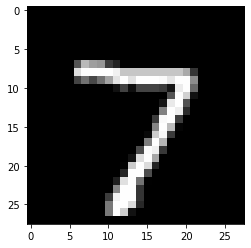

In [64]:
plt.imshow(x_test[0],cmap="gray")
print(y_pred[0])
print(y_pred1[0])